# Accessing the Australian Geoscience Data Cube on the NCI <br>


#### A Technical Capacity Building Webinar for AEOCCG

_Presented by [Alexis McIntyre](mailto:alexis.mcintyre@ga.gov.au?subject=AEOCCG%20webinar%20information) (Geoscience Australia)._

### Abstract

Would you like to know more about how to access and use the Australian Geoscience Data Cube? The Australian Geoscience Data Cube hosts the Australian Landsat Archive and other national Earth Observation collections, alongside access to gridded datasets such as rainfall and elevation.

This webinar will demonstrate how to access the data cube using the Virtual Desktop Infrastructure (VDI) at the National Computational Infrastructure (NCI).

By the end of the webinar you will be able to access national collections of Earth Observation data on the NCI, and use the Australian Geoscience Data Cube in a virtual desktop environment on the NCI.


### Background

This webinar is focused on access to the Australian Geoscience Data Cube via the NCI virtual desktop infrastucture (VDI). 

#### Australian Geoscience Data Cube

 [Australian Geoscience Data Cube (AGDC)](http://www.datacube.org.au/) - provides an integrated gridded data analysis environment for earth observation satellite and related data from multiple satellite and other acquisition systems. **This project facilitates the operational processing and interactive  analysis of national EO data sets and is used to produce the Landsat and MODIS collections on the NCI.**
 
 For specific information on how to use the data cube there are several resources available:
  - Documentation: http://agdc-v2.readthedocs.io/en/stable/
  - How-to Guide: https://docs.google.com/document/d/1CxasZM3QPTzB_47MRyzks63XY2qEvWk6ngYxqsrHdws/edit

#### NCI Virtual Desktop Infrastucture

The [National Computational Infrastructure (NCI)](http://nci.org.au/)  is Australia’s national research computing facility including the Southern Hemisphere’s most highly-integrated supercomputer and filesystems, Australia’s highest performance research cloud, and one of the nation’s largest data catalogues.


#### Connecting to the NCI

If you would like to follow along you will need to set up an account on the NCI and access to the Virtual Desktop Infrastructure (VDI). Use project wd8 to sign up via https://nci.org.au/access/user-registration/register-new-user.  Instructions to set up access to the VDI are available at http://vdi.nci.org.au/help.

Joining project wd8 allows visualisation of all data on the NCI via the VDI, but restricts storage and computing abilities. If extra storage and computing resources are required in the future, this should be discussed with the AGDC or NCI teams.

The AGDC can also be accessed within the High Performance Computing (HPC) environment (i.e. Raijin), and all users with computing quotas on Raijin are able to access the AGDC through the HPC system.


 To connect to the VDI environment to use the AGDC needs a request to join wd8.

#### NCI and RDS Services

NCI have a multi-element system for metadata catalogues and data services
 - [GeoNetwork](http://geonetwork.nci.org.au/geonetwork): Find metadata records (akin to CSIRO DAP)
 - [THREDDS](http://dap.nci.org.au) Data Service: download or remotely access or view data
   - OPeNDAP is one of the protocols served, permits subsetting and remote access to files
   - Other protocols include HTTP download and Open Geospatial Consortium Web Services to stream JPEG, TIFF etc.
 - Geoserver, ERDDAP, Hyrax, others… and filesystem
 - PROMS (provenance), DOI minting (citation)

[AusCover](http://qld.auscover.org.au/public/html/index.html) also uses [THREDDS](http://qld.auscover.org.au/thredds/catalog.html),  [Geoserver](http://qld.auscover.org.au/geoserver/web/), [FTP](ftp://qld.auscover.org.au/) and [HTTP](http://qld.auscover.org.au/public/data/) services to deliver data in a variety of formats, and is working to refine online discovery,  subsetting and reformatting tools for both raster and vector data. Keep an eye out for the new website launching soon.

#### Additional Resources

This all looks a little more tricky than firing up your desktop remote sensing package, but you do get a highly flexible open source analysis environment that give you the ability to perform reproducible research, and operationalise your algorithms nationally with ease.
See the links below for training information, more Jupyter notebooks or NCI help:
 - https://training.nci.org.au 
 - https://github.com/nci/Notebooks
 - http://nci.org.au/user-support/getting-help/



## Presentation Outline

For these examples I'll be using a [Jupyter Notebook](http://jupyter.org/) with code in Python.
 - _The Jupyter Notebook is a web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text and has support for over 40 programming languages, including Python, R, Julia and Scala_. 

Below we will go through:

1. Loading data using the datacube environment on the VDI
2. Displaying an RGB
3. Loading NDVI data
4. Loading Fractional Cover data
5. Saving image data as a GeoTiff
5. Loading a multi-sensor time series





***
### 1. Initiate data cube instance

This will connect to the datacube database

In [1]:
%matplotlib inline
import datacube
dc = datacube.Datacube()

### 2. Load data

Loading data from the datacube uses the [**load**](http://agdc-v2.readthedocs.io/en/develop/dev/generate/datacube.Datacube.load.html#datacube.Datacube.load) function.

The input parameters are all the filters you would like to put into your request for data i.e. sensor, bands, projection to return etc. The function will handle projection and resampling on the fly.

A fairly standard request would include:
* *product*; A specifc product to load
* *x*; Defines the spatial region in the *x* dimension
* *y*; Defines the spatial region in the *y* dimension
* *time*; Defines the temporal extent.

The [**query**](http://agdc-v2.readthedocs.io/en/develop/dev/generate/datacube.api.query.Query.html#datacube.api.query.Query) is a special dictionary object which contains the parameters of your request. We will have a look at building a query object as this is the best way of setting up your request. First let's determine what we would like to request.

#### Product

The product is the type of data you would like to load. A few examples are:

 - ls5_nbar_albers - The corrected and standardised surface reflectance for Landsat 5 in Albers Equal Area Projection
 - ls5_nbart_albers - The same as above with an additional correction for terrain
 - ls5_ndvi_albers - The NDVI calculated from the ls5_nbar_albers
 - ls5_fc_albers - The fractional cover using the JRSRP algorithm calculated from the ls5_nbar_albers
 - bom_rainfall_grids - Daily interpolated rain guage data from the Bereau of Meterology


For a full list of the available products use the [**dc.list_products()**](http://agdc-v2.readthedocs.io/en/develop/dev/generate/datacube.Datacube.list_products.html#datacube.Datacube.list_products) command.

For this exercise we will have a look at some surface reflectance data from Landsat 5, as per the first example listed.

#### Measurements

You can also specify which measurements you are interested in retrieving. For imagery these are the bands, for other types of data these are the variables. This is only required if you do not want to return all of the bands/variables for the product. You can use any of the aliases listed to refer to the measurement i.e. for Landsat 5 products you can either use the band number, (e.g. band 1) or name (e.g. blue).

For a full list of the available measurements use the [**dc.list_measurements()**](http://agdc-v2.readthedocs.io/en/develop/dev/generate/datacube.Datacube.list_measurements.html#datacube.Datacube.list_measurements) command.

For the first example we will ask for the blue, green and red bands.

#### Define the spatial and temporal extents

The next thing we need to do is define the spatial and temporal extents of our request for data. In this case we will look at an area covering the Menindee lakes in NSW over 2008.

So set up the parameters:

In [2]:
start_date = '2008-01-01'
end_date = '2008-04-01'
latitude_min = -32.25
latitude_max = -32.55
longitude_min = 142.1
longitude_max = 142.6
crs = 'EPSG:4326'

#### Set up dictionary for search terms

Here I am setting up a simple dictionary to hold the search terms. This is not strictly necessary, and for a simple case like this probably overkill. It is a good habit to get in to though as you can use this dictionary in the functions, and it makes the rest of the commands much cleaner. Using a dictionary, if you decide that you want to restrict your request to just a few bands, or change the sensor, this is the only part that needs to be changed.

In [3]:
def create_search_parameters(start_date, end_date,latitude_min,\
                        latitude_max, longitude_min,longitude_max,\
                        crs, required_bands = None):
    search_parameters = {}   
    search_parameters['time'] = (start_date, end_date)
    search_parameters['x'] = (longitude_min, longitude_max)
    search_parameters['y'] = (latitude_max, latitude_min)
    search_parameters['crs'] = crs
    search_parameters['group_by'] = 'solar_day'

    return search_parameters

In [4]:
search_terms = create_search_parameters(start_date, end_date,\
                            latitude_min, latitude_max,\
                            longitude_min,longitude_max,\
                            crs)
print search_terms

{'y': (-32.55, -32.25), 'x': (142.1, 142.6), 'group_by': 'solar_day', 'crs': 'EPSG:4326', 'time': ('2008-01-01', '2008-04-01')}


#### Check data is available

Here we use the shapely, folium and rasterio modules to map the extent of the data request.

In [5]:
from shapely.geometry import mapping
from shapely.geometry import MultiPolygon
import shapely.geometry
import shapely.ops
import rasterio
import folium
from IPython.display import display

In [6]:
def datasets_union(dataset_list):
    shapes = shapely.ops.unary_union([shapely.geometry.Polygon(dataset.extent.points) for dataset in dataset_list])
    return shapely.geometry.shape(rasterio.warp.transform_geom('EPSG:3577','EPSG:4326',
                                        shapely.geometry.mapping(shapes)))
def plot_folium(shapes):
    style_function = lambda x: {'fillColor': '#000000' if x['type'] == 'Polygon' else '#00ff00'}
    mapa = folium.Map(location=[-30,150], zoom_start=4)
    for shape in shapes:
        poly = folium.features.GeoJson(mapping(shape), style_function=style_function)
        mapa.add_children(poly)
    display(mapa)

In [7]:
plot_folium([datasets_union(dc.index.datasets.search_eager
                (**datacube.api.query.Query(product = 'ls5_nbar_albers', **search_terms).search_terms))])

#### Load data

We are now ready to load our data:

In [8]:
data = dc.load(product = 'ls5_nbar_albers',**search_terms)
data

<xarray.Dataset>
Dimensions:  (time: 7, x: 1969, y: 1489)
Coordinates:
  * time     (time) datetime64[ns] 2008-01-26 2008-02-04 2008-02-11 ...
  * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
  * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
Data variables:
    blue     (time, y, x) int16 1162 1162 1180 1145 1180 1162 1128 1111 1093 ...
    green    (time, y, x) int16 1579 1614 1579 1614 1649 1649 1579 1579 1579 ...
    red      (time, y, x) int16 2178 2150 2178 2207 2263 2235 2150 2122 2150 ...
    nir      (time, y, x) int16 2759 2723 2759 2759 2796 2723 2649 2613 2613 ...
    swir1    (time, y, x) int16 3023 3023 3048 3073 3124 3073 2972 2997 3023 ...
    swir2    (time, y, x) int16 2392 2464 2428 2428 2392 2392 2428 2356 2392 ...
Attributes:
    crs: EPSG:3577

## Mask poor quality data

We need to create and apply masks for no data vaules, and for pixels affected by cloud, cloud shadow and saturation.

To do this we need to import several other functions.

In [9]:
from datacube.storage.masking import mask_valid_data as mask_invalid_data
from datacube.storage.masking import make_mask
from datacube.helpers import ga_pq_fuser
import numpy as np

We can now create a mask function which masks the appropriate data. Note that when loading the pixel quality data we are using a parameter **like**. This takes an existing datacube dataset and returns the requested dataset with the same parameters (apart from product and measurements).

In [10]:
def mask_pq(data, platform):
    product = '_'.join([platform, 'pq_albers'])
    crs = data.crs
    data = mask_invalid_data(data)
    pq = dc.load(product=product,group_by = 'solar_day', fuse_func = ga_pq_fuser, like = data)
    pq_mask = make_mask(pq.pixelquality, ga_good_pixel = True)
    data = data.where(pq_mask)
    data.attrs['crs'] = crs
    
    return data

In [11]:
data = mask_pq(data, 'ls5')
data

<xarray.Dataset>
Dimensions:  (time: 6, x: 1969, y: 1489)
Coordinates:
  * time     (time) datetime64[ns] 2008-01-26 2008-02-04 2008-02-11 ...
  * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
  * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
Data variables:
    blue     (time, y, x) float64 1.162e+03 1.162e+03 1.18e+03 1.145e+03 ...
    green    (time, y, x) float64 1.579e+03 1.614e+03 1.579e+03 1.614e+03 ...
    red      (time, y, x) float64 2.178e+03 2.15e+03 2.178e+03 2.207e+03 ...
    nir      (time, y, x) float64 2.759e+03 2.723e+03 2.759e+03 2.759e+03 ...
    swir1    (time, y, x) float64 3.023e+03 3.023e+03 3.048e+03 3.073e+03 ...
    swir2    (time, y, x) float64 2.392e+03 2.464e+03 2.428e+03 2.428e+03 ...
Attributes:
    crs: EPSG:3577

## Calculate statistics on the data

The type of object returned by the the load is an xarray.Dataset, and calculating statistical properties of the data can be done using the inbuilt functions of the xarray module.

In [12]:
data.red.max()

<xarray.DataArray 'red' ()>
array(8253.0)

## Plot the data

Plotting a single variable is also very easy, and in this example we are plotting the red band for each date data was captured.

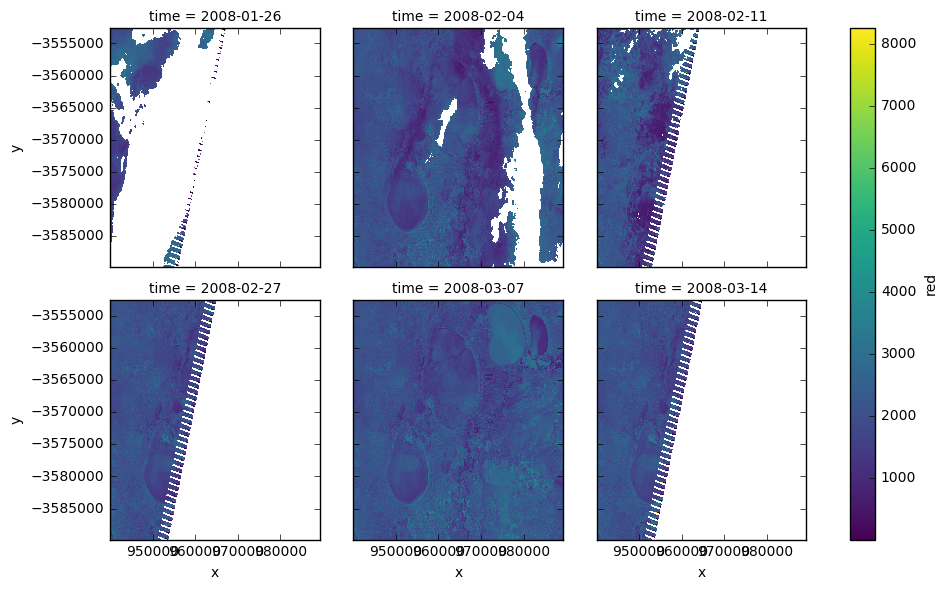

In [13]:
data.red.plot(col='time', col_wrap = 3)

## Display an RGB

Displaying an RGB image requires a little more effort, and the function below demonstrates how to do this.

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from skimage import img_as_float, exposure

In [15]:
def plot_rgb(data, colour_vars=('red', 'green', 'blue'),
             title=None,
             time_index=0, scale_min = None, scale_max = None, ax=None):
    
    # Set title
    if title == None:
        date = data['time'][time_index].values
        ts = pd.to_datetime(str(date)) 
        date_str = ts.strftime('%d/%m/%Y')
        title = date_str
    
    # Set up figure
    if not ax:
        plt.figure(num=None, figsize=(7, 5), dpi=80,
                   facecolor='w', edgecolor='k')
        ax = plt
    plt.axis('off')
    plt.title(title)
    
    #Scaling
    scaled_arrays = {}
    for colour in colour_vars:
        array = data.data_vars[colour][time_index].values/10000     
        if scale_min == None:
            scale_min = np.nanmin(array)
        if scale_max == None:
            scale_max = np.nanmax(array)
        array = array.clip(min=scale_min, max=scale_max)
        array = (array -scale_min) / (scale_max - scale_min)
        indices = np.where(array < 0)
        array[indices] = 0.0
        indices = np.where(array > 1)
        array[indices] = 1.0
        scaled_arrays[colour] = array
    
    #Stacking
    rgb_stack = np.dstack((scaled_arrays[colour_vars[0]],
                           scaled_arrays[colour_vars[1]],
                           scaled_arrays[colour_vars[2]]))
    #Plot RGB
    return ax.imshow(rgb_stack)



We can investigate the dates we have data for by indexing the xarray.DataArray object by time.

In [16]:
data['time']


<xarray.DataArray 'time' (time: 6)>
array(['2008-01-26T00:00:00.000000000', '2008-02-04T00:00:00.000000000',
       '2008-02-11T00:00:00.000000000', '2008-02-27T00:00:00.000000000',
       '2008-03-07T00:00:00.000000000', '2008-03-14T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2008-01-26 2008-02-04 2008-02-11 ...
Attributes:
    units: seconds since 1970-01-01 00:00:00

We can also look at which variables/bands we have.

In [17]:
data.data_vars.keys()

[u'blue', u'green', u'red', u'nir', u'swir1', u'swir2']

/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less
/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in greater


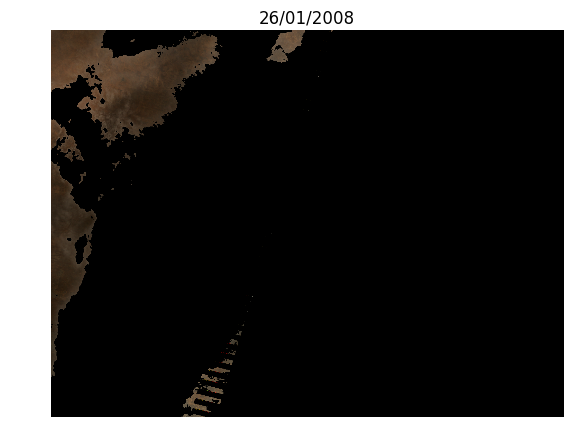

In [18]:
plot_rgb(data)

/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less
/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in greater


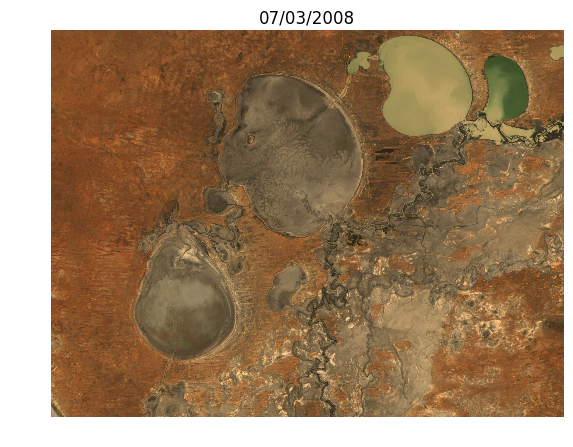

In [19]:
plot_rgb(data, ('red', 'green', 'blue'),
           time_index=4, scale_min=0, scale_max=0.4)

/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less
/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in greater


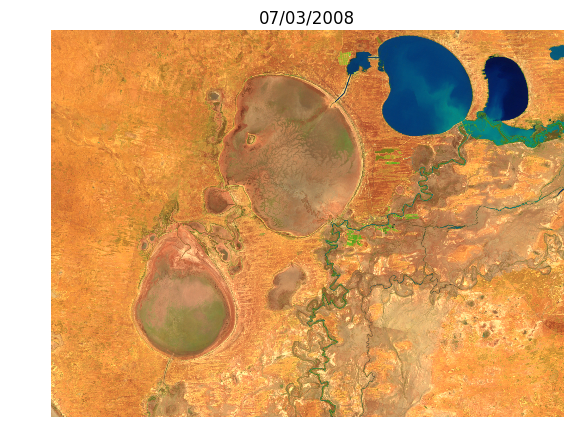

In [20]:
plot_rgb(data, ('swir1', 'nir', 'green'),
           time_index=4, scale_min=0, scale_max=0.5)

## NDVI Display and Analysis

Load and mask NDVI data in the same temporal and spatial extent as the surface reflectance above. Divide by 10000 to give values betweeen 0 and 1.

In [21]:
ndvi_data = mask_pq(dc.load(product='ls5_ndvi_albers', **search_terms), 'ls5')
ndvi_data= ndvi_data/10000

In [22]:
print ndvi_data

<xarray.Dataset>
Dimensions:  (time: 6, x: 1969, y: 1489)
Coordinates:
  * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
  * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
  * time     (time) datetime64[ns] 2008-01-26 2008-02-04 2008-02-11 ...
Data variables:
    ndvi     (time, y, x) float64 0.1176 0.1175 0.1176 0.1111 0.1053 0.0984 ...
Attributes:
    crs: EPSG:3577


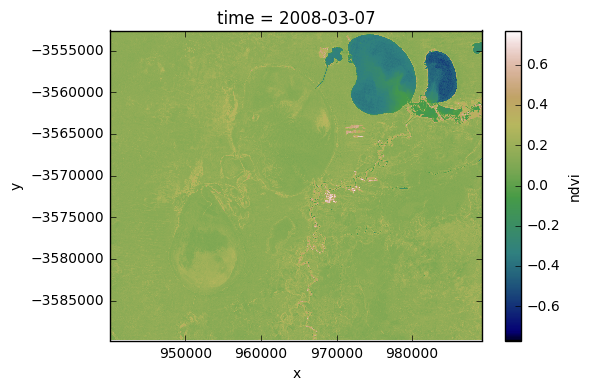

In [23]:
ndvi_data.isel(time=4).ndvi.plot.imshow(cmap = plt.cm.gist_earth)

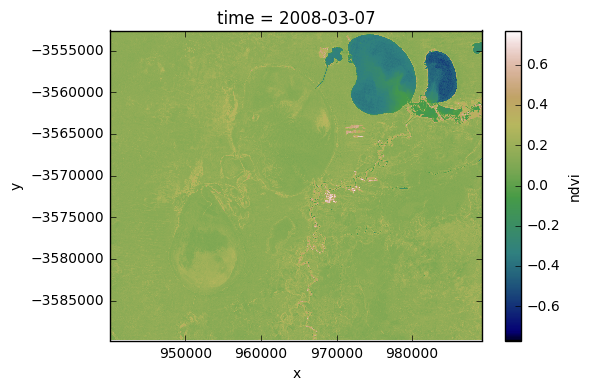

In [24]:
ndvi_data.sel(time='2008-03-07').ndvi.plot.imshow(cmap = plt.cm.gist_earth)

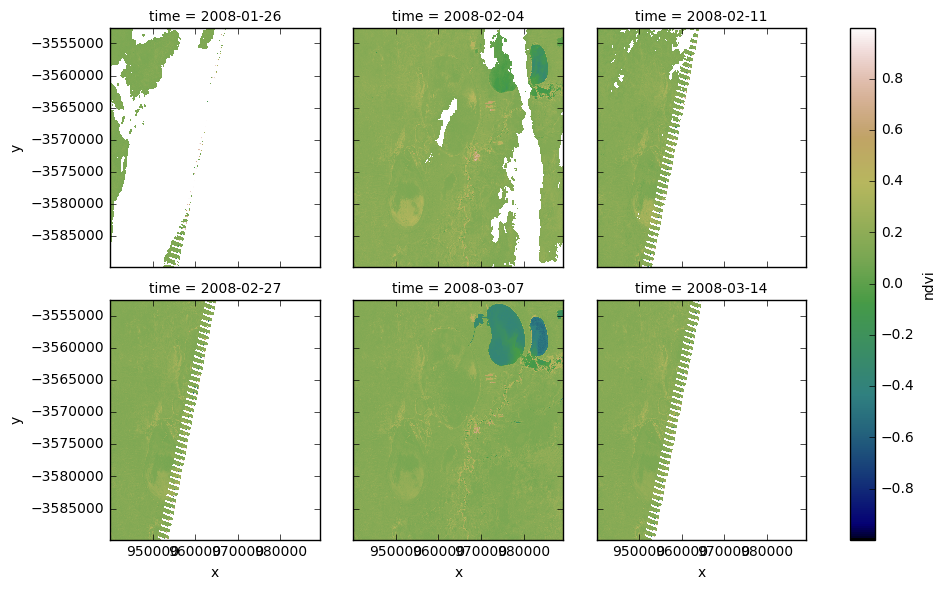

In [25]:
ndvi_data.ndvi.plot(col='time', col_wrap = 3, cmap = plt.cm.gist_earth)

## Fractional Cover Display and Analysis

The Fractional Cover (FC) algorithm was developed by the Joint Remote Sensing Research Program and is described in described in Scarth et al. (2010). It has been implemented by Geoscience Australia for every observation from Landsat Thematic Mapper (Landsat 5), Enhanced Thematic Mapper (Landsat 7) and Operational Land Imager (Landsat 8) acquired since 1987. It is calculated from surface reflectance (SR-N_25_2.0.0).

FC_25 provides a 25m scale fractional cover representation of the proportions of green or photosynthetic vegetation, non-photosynthetic vegetation, and bare surface cover across the Australian continent. The fractions are retrieved by inverting multiple linear regression estimates and using synthetic endmembers in a constrained non-negative least squares unmixing model. For further information please see the articles below describing the method implemented which are free to read:

Scarth, P, Roder, A and Schmidt, M 2010, 'Tracking grazing pressure and climate interaction - the role of Landsat fractional cover in time series analysis', Proceedings of the 15th Australasian Remote Sensing & Photogrammetry Conference,

Schmidt, M, Denham, R and Scarth, P 2010, 'Fractional ground cover monitoring of pastures and agricultural areas in Queensland', Proceedings of the 15th Australasian Remote Sensing & Photogrammetry Conference

A summary of the algorithm developed by the Joint Remote Sensing Centre is also available from the AusCover website: http://www.auscover.org.au/purl/landsat-fractional-cover-jrsrp

Fractional cover data can be used to identify large scale patterns and trends and inform evidence based decision making and policy on topics including wind and water erosion risk, soil carbon dynamics, land management practices and rangeland condition. This information could enable policy agencies, natural and agricultural land resource managers, and scientists to monitor land conditions over large areas over long time frames.

Load and mask fractional cover data.Load and mask fractional cover data.

In [26]:
fc_data = mask_pq(dc.load(product='ls5_fc_albers', **search_terms), 'ls5')

In [27]:
fc_data = fc_data/100

In [28]:
print fc_data

<xarray.Dataset>
Dimensions:  (time: 4, x: 1969, y: 1489)
Coordinates:
  * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
  * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
  * time     (time) datetime64[ns] 2008-01-26 2008-02-04 2008-02-11 2008-03-14
Data variables:
    BS       (time, y, x) float64 0.5 0.55 0.51 0.49 0.42 0.45 0.56 0.47 ...
    PV       (time, y, x) float64 0.05 0.06 0.05 0.04 0.02 0.02 0.04 0.03 ...
    NPV      (time, y, x) float64 0.43 0.38 0.42 0.45 0.54 0.51 0.38 0.49 ...
    UE       (time, y, x) float64 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 ...
Attributes:
    crs: EPSG:3577


Plot a time-series of values for a particular location.

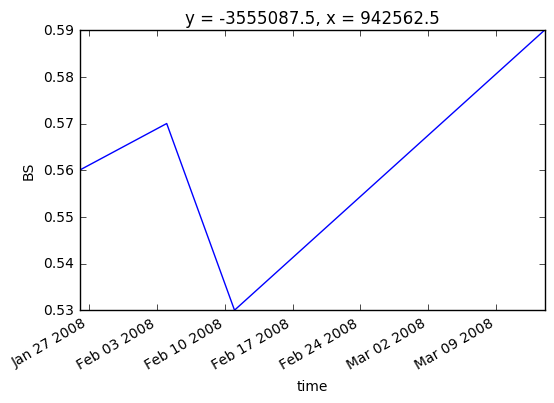

In [29]:
fc_data.BS.isel(x=100, y=100).plot()

Plot the bare soil fraction for all available dates.

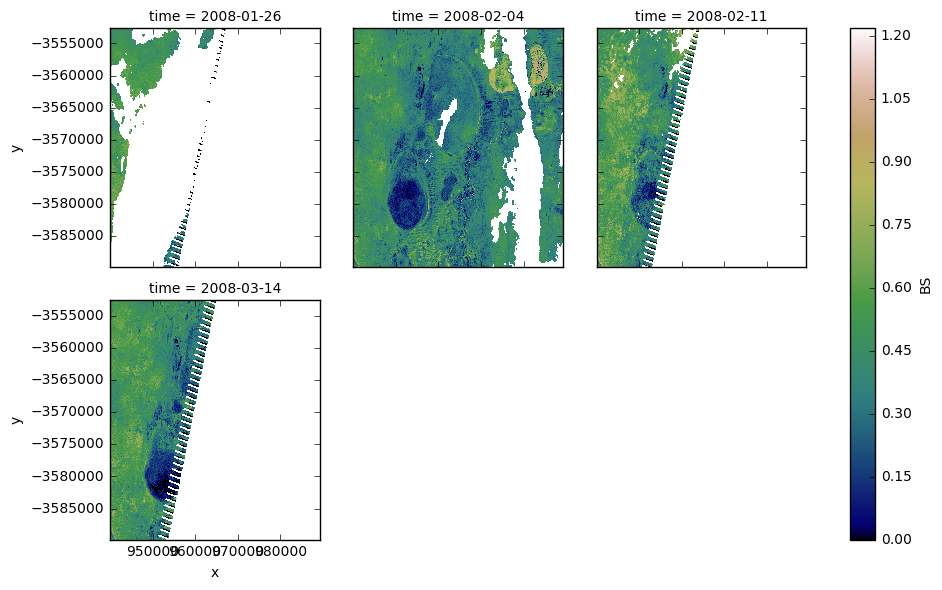

In [30]:
fc_data.BS.plot(col='time', col_wrap = 3, cmap = plt.cm.gist_earth)

Plot an RGB for the date with the most data coverage.

/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in less
/g/data2/v10/public/modules/agdc-py2-env/20161019/envs/agdc/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in greater


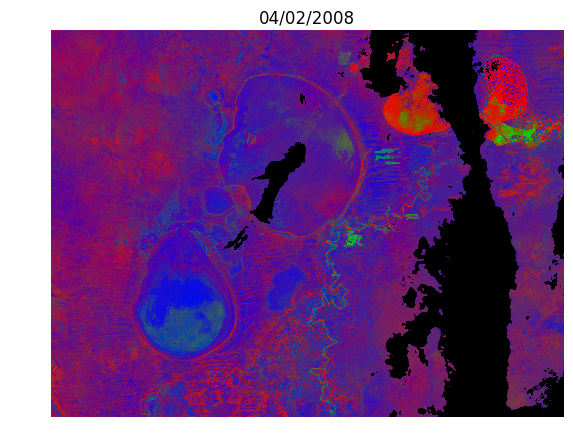

In [31]:
plot_rgb(fc_data, ('BS', 'PV', 'NPV'), time_index=1)

Save the image as a GeoTiff file.

In [32]:
from datacube.helpers import write_geotiff
write_geotiff(r'/local/wd8/alm547/fc_test_output.tif', fc_data, time_index=1)

Calculate the maximum value for all bands over the entire area.

In [33]:
fc_max = fc_data.max(dim='time')

In [34]:
print fc_max

<xarray.Dataset>
Dimensions:  (x: 1969, y: 1489)
Coordinates:
  * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
  * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
Data variables:
    BS       (y, x) float64 0.71 0.71 0.75 0.73 0.76 0.73 0.7 0.69 0.66 0.65 ...
    PV       (y, x) float64 0.06 0.06 0.07 0.08 0.08 0.08 0.07 0.07 0.08 ...
    NPV      (y, x) float64 0.43 0.41 0.42 0.45 0.54 0.51 0.43 0.49 0.48 ...
    UE       (y, x) float64 0.1 0.1 0.09 0.09 0.08 0.08 0.08 0.08 0.07 0.07 ...


## Time Series Analysis

In [35]:
import xarray

Specify the data to include:

In [36]:
products = ['ls5_nbar_albers', 'ls7_nbar_albers']

Find the matching variables/bands:

In [37]:
measurements = set(dc.index.products.get_by_name(products[0]).measurements.keys())
for prod in products[1:]:
    measurements.intersection(dc.index.products.get_by_name(products[0]).measurements.keys())
measurements

{u'blue', u'green', u'nir', u'red', u'swir1', u'swir2'}

In [38]:
print search_terms
search_terms['time'] = ('2005-09-01', '2006-01-01')
print search_terms

{'y': (-32.55, -32.25), 'x': (142.1, 142.6), 'group_by': 'solar_day', 'crs': 'EPSG:4326', 'time': ('2008-01-01', '2008-04-01')}
{'y': (-32.55, -32.25), 'x': (142.1, 142.6), 'group_by': 'solar_day', 'crs': 'EPSG:4326', 'time': ('2005-09-01', '2006-01-01')}


In [39]:
datasets = []
for prod in products:
    ds = mask_pq(dc.load(product=prod, measurements=measurements, **search_terms), prod.split('_')[0])
    ds['product'] = ('time', np.repeat(prod, ds.time.size))
    datasets.append(ds)

In [40]:
datasets

[<xarray.Dataset>
 Dimensions:  (time: 10, x: 1969, y: 1489)
 Coordinates:
   * time     (time) datetime64[ns] 2005-09-07 2005-09-14 2005-09-23 ...
   * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
   * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
 Data variables:
     blue     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
     swir1    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
     swir2    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
     green    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
     nir      (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
     red      (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
     product  (time) |S15 'ls5_nbar_albers' 'ls5_nbar_albers' ...
 Attributes:
     crs: EPSG:3577, <xarray.Dataset>
 Dimensions:  (time: 7, x: 1969, y: 1489)
 Coordinates:
   * time     (time) datetime64[ns

In [41]:
combined = xarray.concat(datasets, dim='time')
combined = combined.isel(time=combined.time.argsort())  # sort along time dim

In [42]:
combined

<xarray.Dataset>
Dimensions:  (time: 17, x: 1969, y: 1489)
Coordinates:
  * y        (y) float64 -3.553e+06 -3.553e+06 -3.553e+06 -3.553e+06 ...
  * x        (x) float64 9.401e+05 9.401e+05 9.401e+05 9.401e+05 9.402e+05 ...
  * time     (time) datetime64[ns] 2005-09-07 2005-09-14 2005-09-15 ...
Data variables:
    blue     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    product  (time) |S15 'ls5_nbar_albers' 'ls5_nbar_albers' ...
    swir1    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    swir2    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    green    (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    nir      (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    red      (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    crs: EPSG:3577

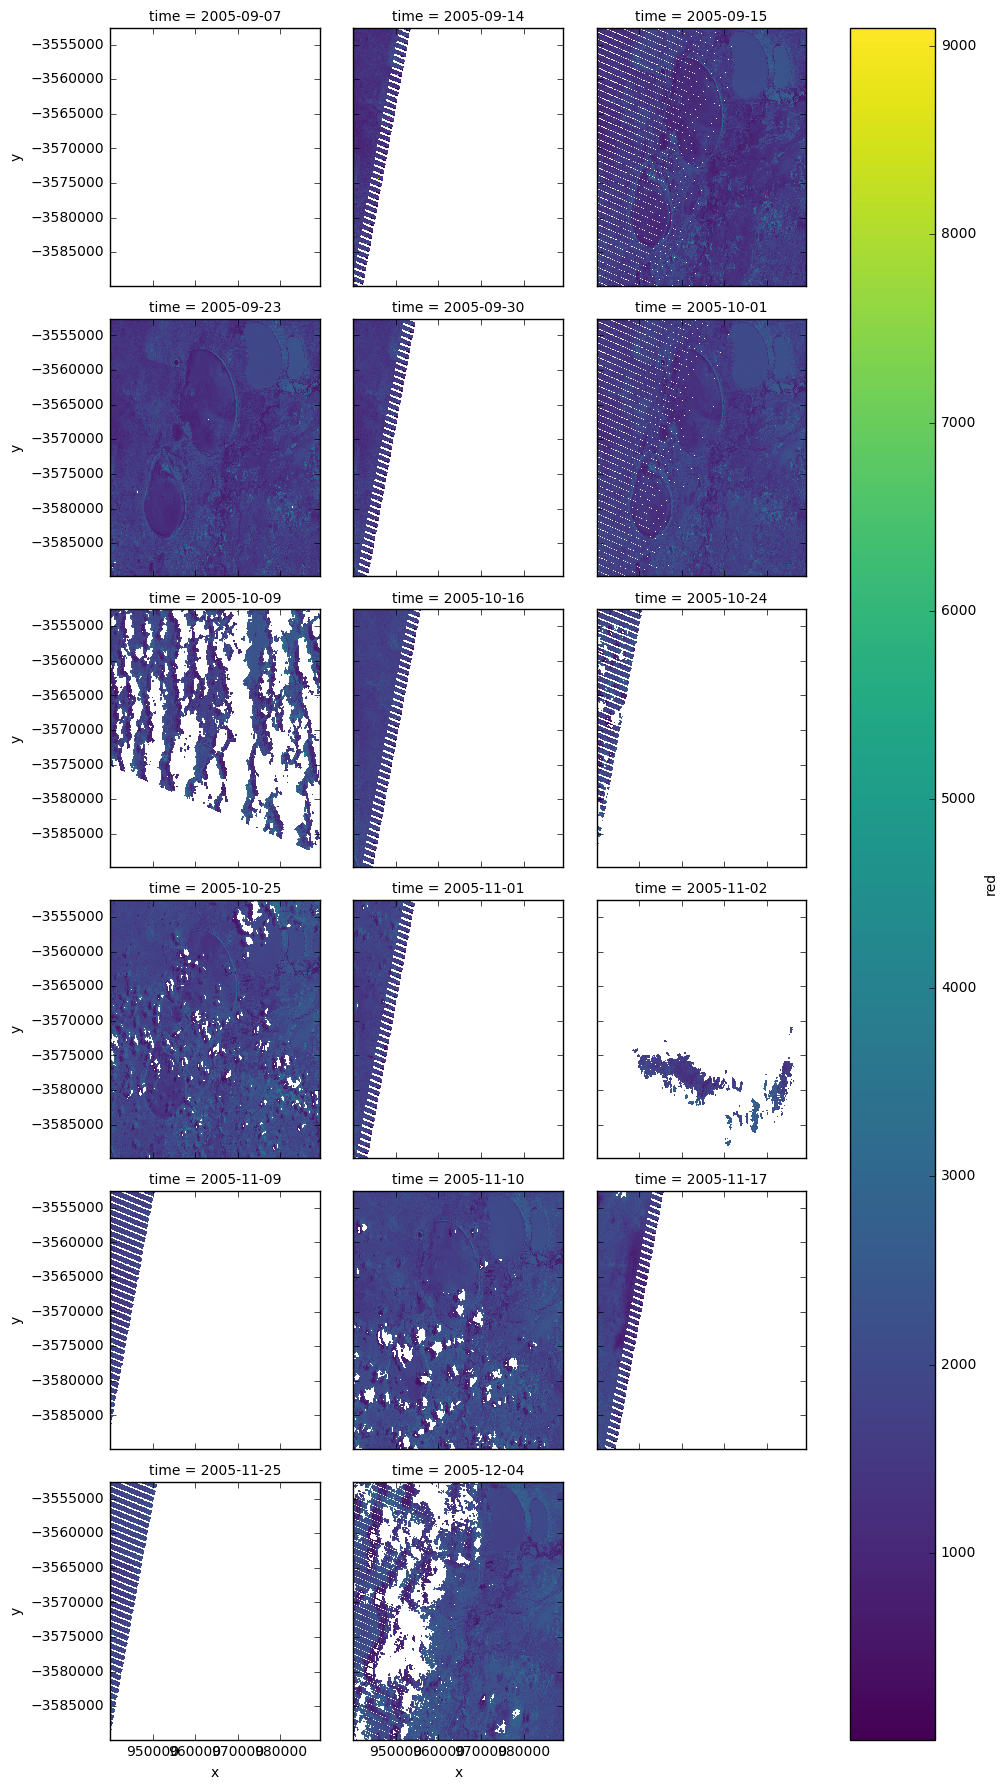

In [43]:
combined.red.plot(col='time', col_wrap=3)

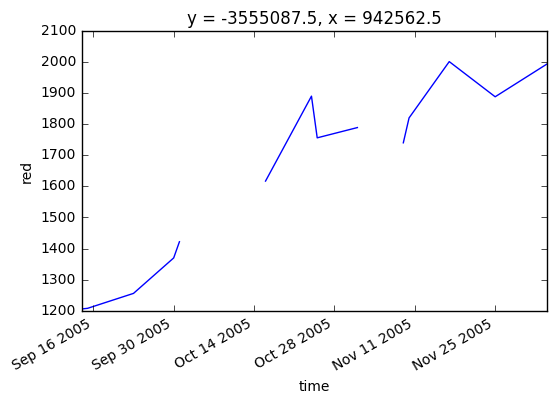

In [44]:
combined.red.isel(x=100, y=100).plot()

Plot with different markers for each sensor.

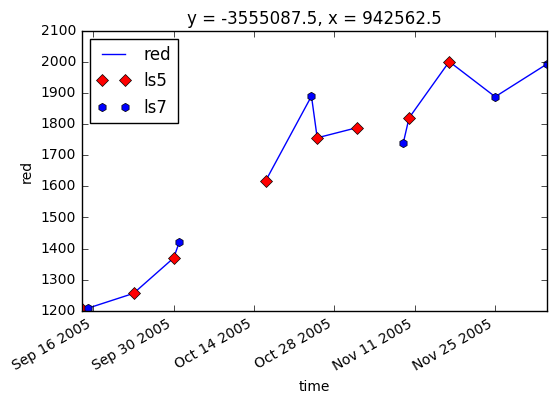

In [45]:
ls5_times = np.where(combined.product == 'ls5_nbar_albers')[0]
ls7_times = np.where(combined.product == 'ls7_nbar_albers')[0]
red_vals = combined.red.isel(x=100, y=100)
red_vals.plot()
plt.plot(combined.time[ls5_times], red_vals[ls5_times], 'rD', label='ls5')
plt.plot(combined.time[ls7_times], red_vals[ls7_times], 'bh', label='ls7')
plt.legend(loc=0)


For help with using the datacube the best place to direct questions is to the [data-cube slack channel](https://data-cube.slack.com).